In [1]:
# Importing libraries
import numpy as np 
import pandas as pd

In [2]:
telco_data = pd.read_csv('/kaggle/input/wa-fnusec-telcocustomerchurn/WA_Fn-UseC_-Telco-Customer-Churn.csv')
telco_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
telco_data.shape

(7043, 21)

In [4]:
telco_data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [5]:
telco_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
telco_data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Dataset comprises of 7043 rows and 21 attributes. There are no null values in the dataset but the column TotalCharges is wrongly detected as object.

In [7]:
telco_data.TotalCharges = pd.to_numeric(telco_data.TotalCharges, errors='coerce')

In [8]:
telco_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [9]:
telco_data.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

TotalCharges have 11 Missing values. 

In [10]:
telco_data[telco_data.TotalCharges.isnull()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


All these observations have zero tenure eventhough the monthly charges are not null. These observations look contradictory.

In [11]:
# lets look at unique values for each column
for column in telco_data.columns:
    print('Column: {} - Unique Values: {}'.format(column, telco_data[column].unique()))

Column: customerID - Unique Values: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
Column: gender - Unique Values: ['Female' 'Male']
Column: SeniorCitizen - Unique Values: [0 1]
Column: Partner - Unique Values: ['Yes' 'No']
Column: Dependents - Unique Values: ['No' 'Yes']
Column: tenure - Unique Values: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
Column: PhoneService - Unique Values: ['No' 'Yes']
Column: MultipleLines - Unique Values: ['No phone service' 'No' 'Yes']
Column: InternetService - Unique Values: ['DSL' 'Fiber optic' 'No']
Column: OnlineSecurity - Unique Values: ['No' 'Yes' 'No internet service']
Column: OnlineBackup - Unique Values: ['Yes' 'No' 'No internet service']
Column: DeviceProtection - Unique Values: ['No' 'Yes' 'No internet service']
Column: TechSuppor

These columns can be categorized into 3 categories

1. Demographic Information
    - gender
    - SeniorCitizen
    - Partner
    - Dependents
2. Customer Account Information
    - tenure
    - Contract
    - PaperlessBilling
    - PaymentMethod
    - MonthlyCharges
    - TotalCharges
3. Services Information
    - PhoneService
    - MultipleLines
    - InternetServices
    - OnlineSecurity
    - OnlineBackup
    - DeviceProtection
    - TechSupport
    - StreamingTV
    - StreamingMovies

In [12]:
#Dropping customerID 
telco_data.drop(columns='customerID', inplace=True)

Column: PaymentMethod - Unique Values: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
 the string '(automatic)' is redundant. 

In [13]:
telco_data['PaymentMethod'] = telco_data['PaymentMethod'].str.replace(' (automatic)', '', regex=False)

In [14]:
telco_data.PaymentMethod.unique()

array(['Electronic check', 'Mailed check', 'Bank transfer', 'Credit card'],
      dtype=object)

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


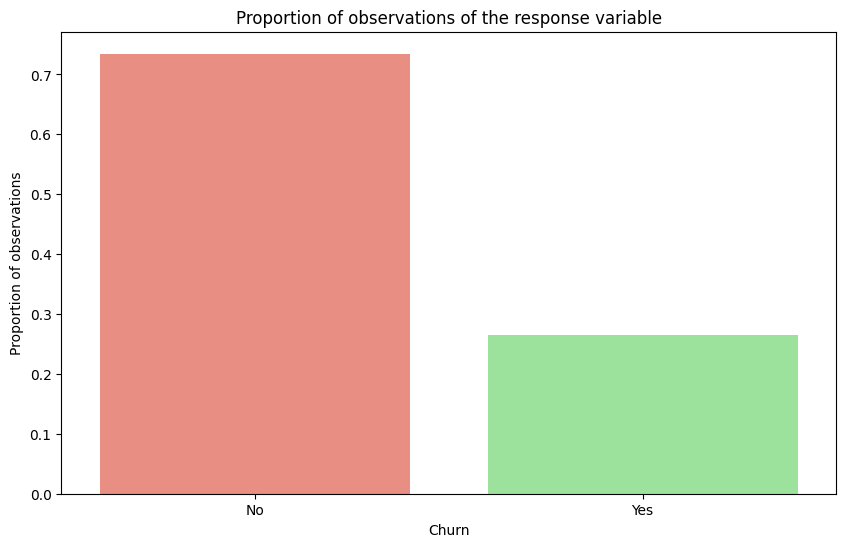

In [16]:
fig, ax = plt.subplots(figsize=(10, 6))
churn_response_proportion = telco_data['Churn'].value_counts(normalize=True)
sns.barplot(x=churn_response_proportion.index, y=churn_response_proportion, palette=['salmon', 'lightgreen'])
plt.title("Proportion of observations of the response variable")
plt.xlabel('Churn')
plt.ylabel('Proportion of observations')
plt.show()

the dataset is imbalanced. lets take a look at normalized stacked bar plots for each variable to understand the influence on Churn column

Lets start with demographic information

- gender
- SeniorCitizen
- Partner
- Dependents

In [17]:

def percentage_stacked_plot(columns_to_plot, super_title):
    
    '''
    Prints a 100% stacked plot of the response variable for independent variable of the list columns_to_plot.
            Parameters:
                    columns_to_plot (list of string): Names of the variables to plot
                    super_title (string): Super title of the visualization
            Returns:
                    None
    '''
    
    number_of_columns = 2
    number_of_rows = math.ceil(len(columns_to_plot)/2)

    # create a figure
    fig = plt.figure(figsize=(12, 5 * number_of_rows)) 
    fig.suptitle(super_title, fontsize=22,  y=.95)
 

    # loop to each column name to create a subplot
    for index, column in enumerate(columns_to_plot, 1):

        # create the subplot
        ax = fig.add_subplot(number_of_rows, number_of_columns, index)

        # calculate the percentage of observations of the response variable for each group of the independent variable
        # 100% stacked bar plot
        prop_by_independent = pd.crosstab(telco_data[column], telco_data['Churn']).apply(lambda x: x/x.sum()*100, axis=1)

        prop_by_independent.plot(kind='bar', ax=ax, stacked=True,
                                 rot=0, color=['springgreen','salmon'])

        # set the legend in the upper right corner
        ax.legend(loc="upper right", bbox_to_anchor=(0.62, 0.5, 0.5, 0.5),
                  title='Churn', fancybox=True)

        # set title and labels
        ax.set_title('Proportion of observations by ' + column,
                     fontsize=16, loc='left')

        ax.tick_params(rotation='auto')

        # eliminate the frame from the plot
        spine_names = ('top', 'right', 'bottom', 'left')
        for spine_name in spine_names:
            ax.spines[spine_name].set_visible(False)


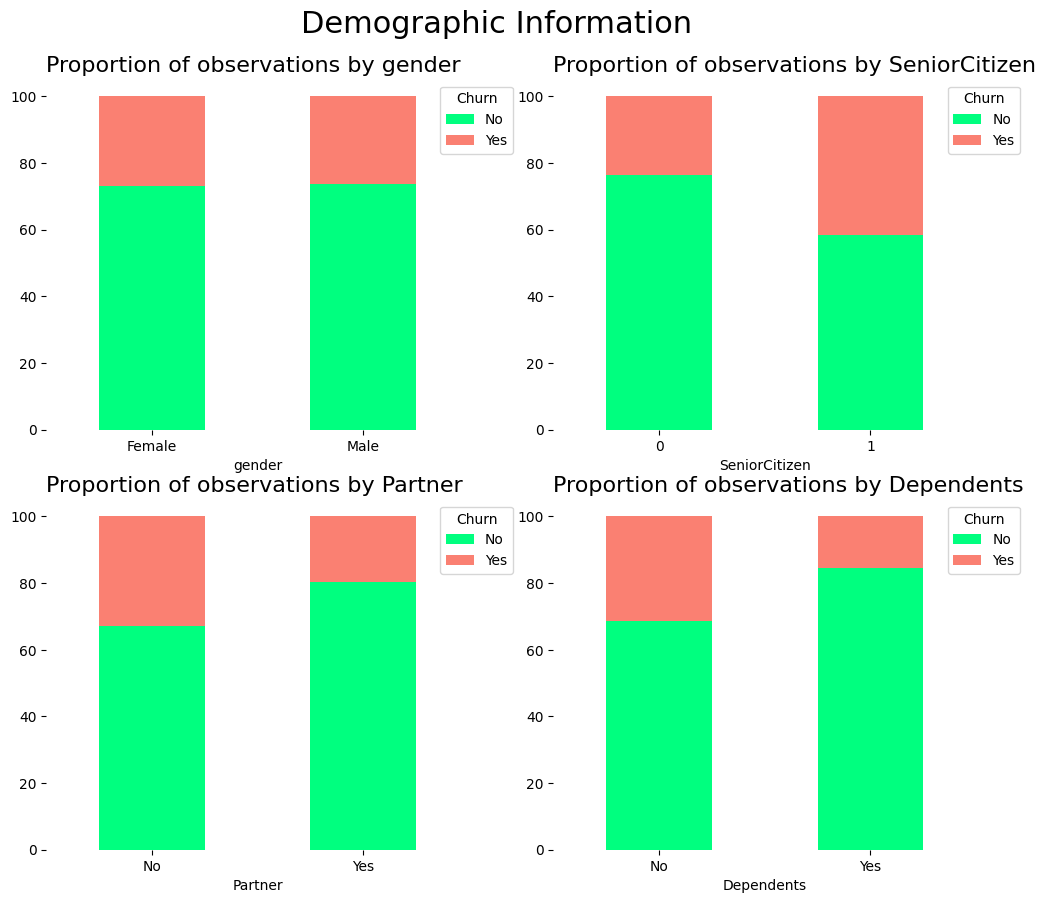

In [18]:
# demographic column names
demographic_columns = ['gender', 'SeniorCitizen', 'Partner', 'Dependents']

# stacked plot of demographic columns
percentage_stacked_plot(demographic_columns, 'Demographic Information')


- The churn rate for senior citizens is nearly twice as high as the churn rate for young citizens. 

- Gender does not appear to be a major predictive factor for churn. The churn rate is similar for both male and female customers. 

- Customers who have a partner are less likely to churn compared to customers without a partner.

Lets do the same anlysis on Customer Account Information
- contract
- papelessbilling
- paymentmethod

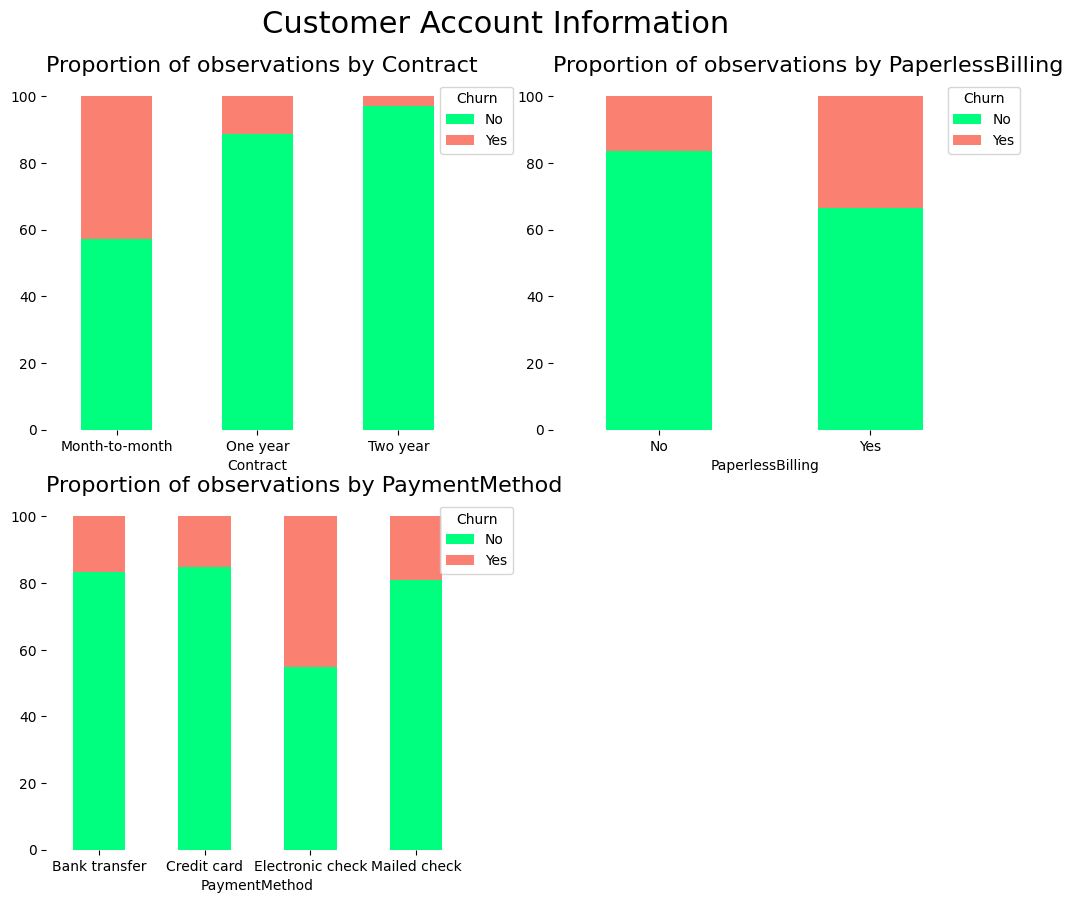

In [19]:

# customer account column names
account_columns = ['Contract', 'PaperlessBilling', 'PaymentMethod']

# stacked plot of customer account columns
percentage_stacked_plot(account_columns, 'Customer Account Information')


- Customers with month-to-month contracts have higher churn rates than customers with yearly contracts.

- Customers who pay by electronic check are more likely to churn compared to those using other payment methods. 

- Customers who are subscribed to paperless billing have a higher churn rate than those who receive paper bills.

Lets do the analysis on Customer Account Information
- tenure
- monthlycharges
- totalcharges

For all numeric attributes, we see differing distributions between customers who churned and those who did not. This suggests that each of these attributes will be useful in predicting whether a given customer is likely to churn. Specifically, the distribution of values is different for churning versus non-churning customers across all the numeric attributes. This indicates these features contain signal that can help distinguish between the two classes.

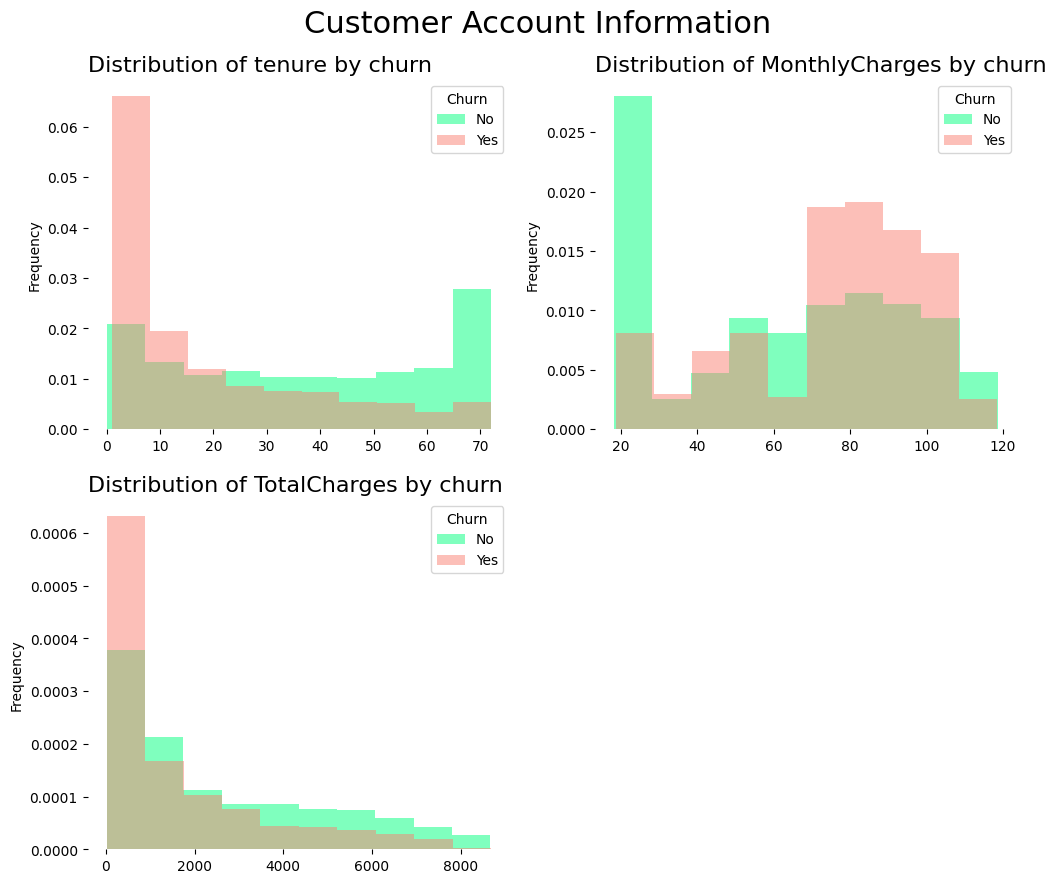

In [20]:

def histogram_plots(columns_to_plot, super_title):
    '''
     Prints a histogram for each independent variable of the list columns_to_plot.
            Parameters:
                    columns_to_plot (list of string): Names of the variables to plot
                    super_title (string): Super title of the visualization
            Returns:
                    None
    '''
    # set number of rows and number of columns
    number_of_columns = 2
    number_of_rows = math.ceil(len(columns_to_plot)/2)

    # create a figure
    fig = plt.figure(figsize=(12, 5 * number_of_rows)) 
    fig.suptitle(super_title, fontsize=22,  y=.95)
 

    # loop to each demographic column name to create a subplot
    for index, column in enumerate(columns_to_plot, 1):

        # create the subplot
        ax = fig.add_subplot(number_of_rows, number_of_columns, index)

        # histograms for each class (normalized histogram)
        telco_data[telco_data['Churn']=='No'][column].plot(kind='hist', ax=ax, density=True, 
                                                       alpha=0.5, color='springgreen', label='No')
        telco_data[telco_data['Churn']=='Yes'][column].plot(kind='hist', ax=ax, density=True,
                                                        alpha=0.5, color='salmon', label='Yes')
        
        # set the legend in the upper right corner
        ax.legend(loc="upper right", bbox_to_anchor=(0.5, 0.5, 0.5, 0.5),
                  title='Churn', fancybox=True)

        # set title and labels
        ax.set_title('Distribution of ' + column + ' by churn',
                     fontsize=16, loc='left')

        ax.tick_params(rotation='auto')

        # eliminate the frame from the plot
        spine_names = ('top', 'right', 'bottom', 'left')
        for spine_name in spine_names:
            ax.spines[spine_name].set_visible(False)
            
# customer account column names
account_columns_numeric = ['tenure', 'MonthlyCharges', 'TotalCharges']
# histogram of costumer account columns 
histogram_plots(account_columns_numeric, 'Customer Account Information')


- There is a trend of higher churn rates when monthly charges are high.
- Customers who have been with the company for a short tenure (new customers) tend to have higher churn rates.
- Customers with high total charges accrued over time are less likely to churn.

Lets do the analysis for services
- PhoneService
- MultipleLines
- InternetServices
- OnlineSecurity
- OnlineBackup
- DeviceProtection
- TechSupport
- StreamingTV
- StreamingMovies

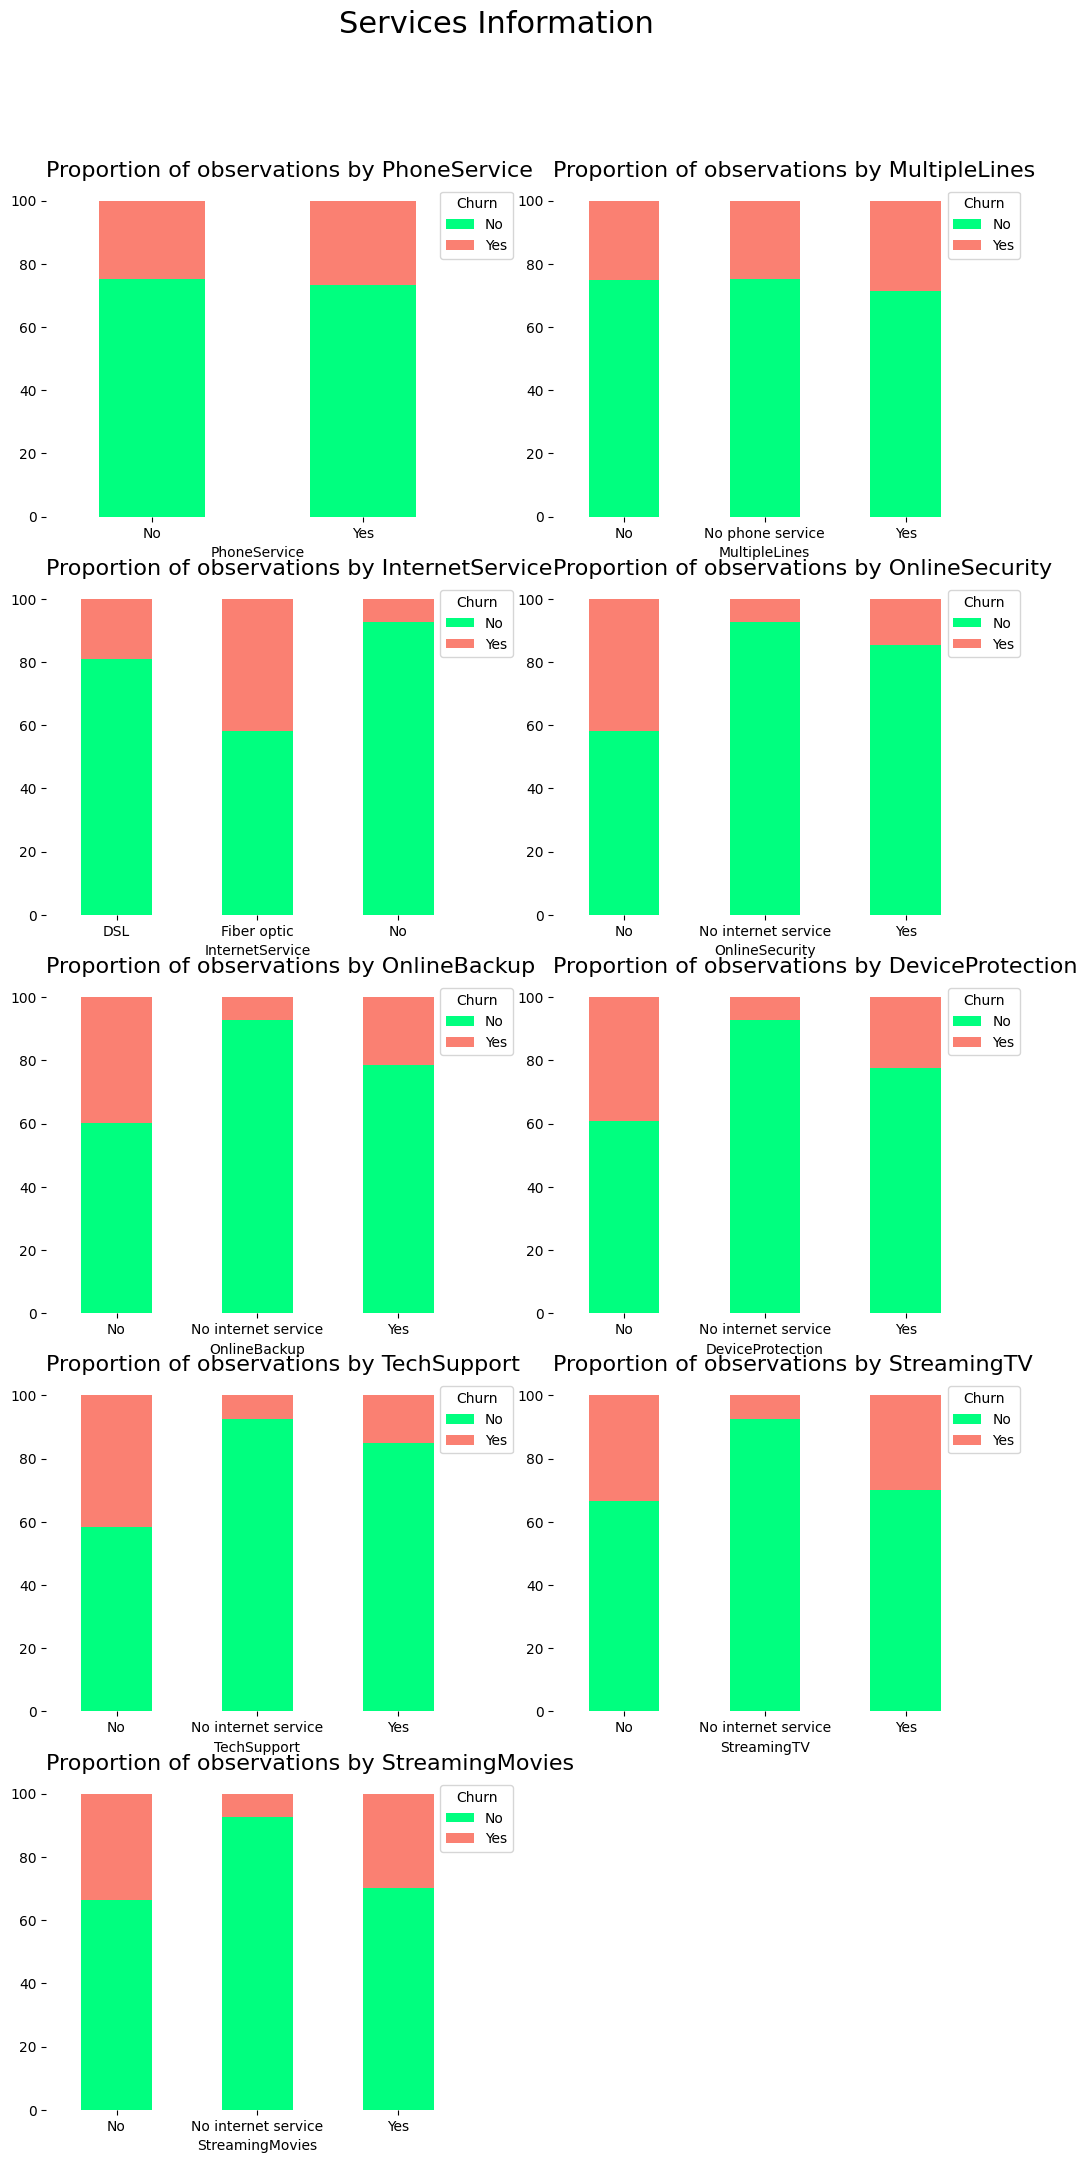

In [21]:
# services column names
services_columns = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
                   'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

# stacked plot of services columns
percentage_stacked_plot(services_columns, 'Services Information')



- Phone service attributes like having phone service or multiple lines do not appear to be major predictive factors for churn. The churn percentage is nearly equal across the different classes of these variables.

- Customers who have online security enabled churn less than those without online security.

- Customers without tech support tend to have higher churn rates compared to those who have tech support.

Lets understand the mutual dependency between independent categorical variables and the response variable

In [22]:
from sklearn.metrics import mutual_info_score

# function that computes the mutual information score between a categorical series and the column Churn
def compute_mutual_information(categorical_series):
    return mutual_info_score(categorical_series, telco_data['Churn'])

# select categorical variables excluding the response variable
categorical_variables = telco_data.select_dtypes(include='object').drop('Churn', axis=1)

# compute the mutual information score between each categorical variable and the target
feature_importance = categorical_variables.apply(compute_mutual_information).sort_values(ascending=False)

# visualize feature importance
print(feature_importance)


Contract            0.098453
OnlineSecurity      0.064677
TechSupport         0.063021
InternetService     0.055574
OnlineBackup        0.046792
PaymentMethod       0.044519
DeviceProtection    0.043917
StreamingMovies     0.032001
StreamingTV         0.031908
PaperlessBilling    0.019194
Dependents          0.014467
Partner             0.011454
MultipleLines       0.000801
PhoneService        0.000072
gender              0.000037
dtype: float64


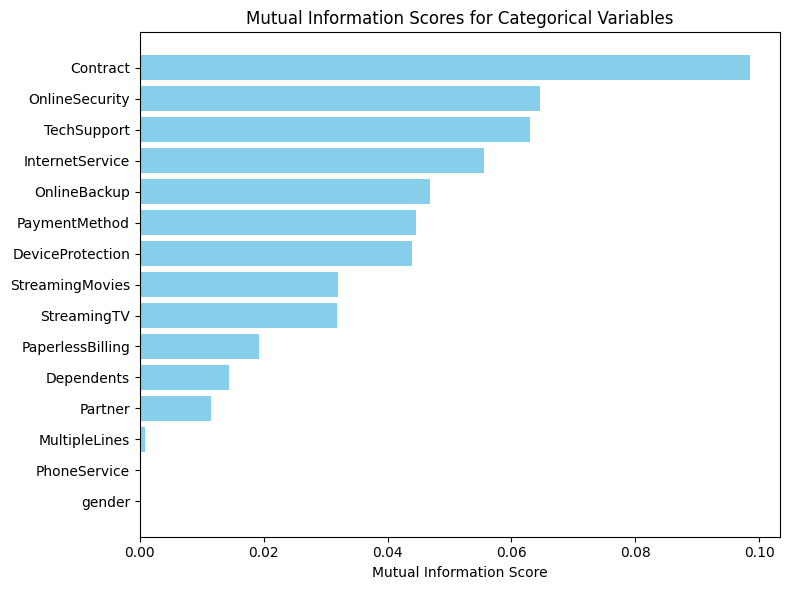

In [23]:

# Plotting the horizontal bar graph
plt.figure(figsize=(8, 6))
feature_importance_sorted = feature_importance.sort_values() 
plt.barh(feature_importance_sorted.index, feature_importance_sorted.values, color='skyblue')
plt.xlabel('Mutual Information Score')
plt.title('Mutual Information Scores for Categorical Variables')
plt.tight_layout()
plt.show()


The variables gender, PhoneService, and MultipleLines have mutual information scores very close to 0 with respect to the target churn variable. This indicates these features do not have a strong relationship with churn. This aligns with our previous conclusions from visualizing the data

In [24]:
telco_data_tranformed = telco_data.copy()

# label encoding (binary variables)
label_encoding_columns = ['gender', 'Partner', 'Dependents', 'PaperlessBilling', 'PhoneService', 'Churn']

# encode categorical binary features using label encoding
for column in label_encoding_columns:
    if column == 'gender':
        telco_data_tranformed[column] = telco_data_tranformed[column].map({'Female': 1, 'Male': 0})
    else: 
        telco_data_tranformed[column] = telco_data_tranformed[column].map({'Yes': 1, 'No': 0}) 

In [25]:

# one-hot encoding (categorical variables with more than two levels)
one_hot_encoding_columns = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
                            'TechSupport', 'StreamingTV',  'StreamingMovies', 'Contract', 'PaymentMethod']

# encode categorical variables with more than two levels using one-hot encoding
telco_data_tranformed = pd.get_dummies(telco_data_tranformed, columns = one_hot_encoding_columns)


In [26]:
telco_data_tranformed.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer,PaymentMethod_Credit card,PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,1,29.85,29.85,0,...,True,False,False,True,False,False,False,False,True,False
1,0,0,0,0,34,1,0,56.95,1889.50,0,...,True,False,False,False,True,False,False,False,False,True
2,0,0,0,0,2,1,1,53.85,108.15,1,...,True,False,False,True,False,False,False,False,False,True
3,0,0,0,0,45,0,0,42.30,1840.75,0,...,True,False,False,False,True,False,True,False,False,False
4,1,0,0,0,2,1,1,70.70,151.65,1,...,True,False,False,True,False,False,False,False,True,False


In [27]:

# min-max normalization (numeric variables)
min_max_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']

# scale numerical variables using min max scaler
for column in min_max_columns:
        # minimum value of the column
        min_column = telco_data_tranformed[column].min()
        # maximum value of the column
        max_column = telco_data_tranformed[column].max()
        # min max scaler
        telco_data_tranformed[column] = (telco_data_tranformed[column] - min_column) / (max_column - min_column)   


In [28]:
telco_data_tranformed.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer,PaymentMethod_Credit card,PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,0.013889,0,1,0.115423,0.001275,0,...,True,False,False,True,False,False,False,False,True,False
1,0,0,0,0,0.472222,1,0,0.385075,0.215867,0,...,True,False,False,False,True,False,False,False,False,True
2,0,0,0,0,0.027778,1,1,0.354229,0.010310,1,...,True,False,False,True,False,False,False,False,False,True
3,0,0,0,0,0.625000,0,0,0.239303,0.210241,0,...,True,False,False,False,True,False,True,False,False,False
4,1,0,0,0,0.027778,1,1,0.521891,0.015330,1,...,True,False,False,True,False,False,False,False,True,False


In [29]:
telco_data_tranformed.isnull().sum()

gender                                   0
SeniorCitizen                            0
Partner                                  0
Dependents                               0
tenure                                   0
PhoneService                             0
PaperlessBilling                         0
MonthlyCharges                           0
TotalCharges                            11
Churn                                    0
MultipleLines_No                         0
MultipleLines_No phone service           0
MultipleLines_Yes                        0
InternetService_DSL                      0
InternetService_Fiber optic              0
InternetService_No                       0
OnlineSecurity_No                        0
OnlineSecurity_No internet service       0
OnlineSecurity_Yes                       0
OnlineBackup_No                          0
OnlineBackup_No internet service         0
OnlineBackup_Yes                         0
DeviceProtection_No                      0
DeviceProte

In [30]:
telco_data_tranformed.dropna(inplace=True)
telco_data_tranformed.isnull().sum()

gender                                  0
SeniorCitizen                           0
Partner                                 0
Dependents                              0
tenure                                  0
PhoneService                            0
PaperlessBilling                        0
MonthlyCharges                          0
TotalCharges                            0
Churn                                   0
MultipleLines_No                        0
MultipleLines_No phone service          0
MultipleLines_Yes                       0
InternetService_DSL                     0
InternetService_Fiber optic             0
InternetService_No                      0
OnlineSecurity_No                       0
OnlineSecurity_No internet service      0
OnlineSecurity_Yes                      0
OnlineBackup_No                         0
OnlineBackup_No internet service        0
OnlineBackup_Yes                        0
DeviceProtection_No                     0
DeviceProtection_No internet servi

In [31]:
X = telco_data_tranformed.drop(columns='Churn')
y = telco_data_tranformed.loc[:, 'Churn']
X.columns, y.name

(Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
        'PhoneService', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
        'MultipleLines_No', 'MultipleLines_No phone service',
        'MultipleLines_Yes', 'InternetService_DSL',
        'InternetService_Fiber optic', 'InternetService_No',
        'OnlineSecurity_No', 'OnlineSecurity_No internet service',
        'OnlineSecurity_Yes', 'OnlineBackup_No',
        'OnlineBackup_No internet service', 'OnlineBackup_Yes',
        'DeviceProtection_No', 'DeviceProtection_No internet service',
        'DeviceProtection_Yes', 'TechSupport_No',
        'TechSupport_No internet service', 'TechSupport_Yes', 'StreamingTV_No',
        'StreamingTV_No internet service', 'StreamingTV_Yes',
        'StreamingMovies_No', 'StreamingMovies_No internet service',
        'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year',
        'Contract_Two year', 'PaymentMethod_Bank transfer',
        'PaymentMethod_Cre

In [32]:
from sklearn.model_selection import train_test_split
# split the data in training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,
                                                    random_state=40, shuffle=True)

In [33]:
from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier


In [34]:

def create_models(seed=2):
    '''
    Create a list of machine learning models.
            Parameters:
                    seed (integer): random seed of the models
            Returns:
                    models (list): list containing the models
    '''

    models = []
    models.append(('dummy_classifier', DummyClassifier(random_state=seed, strategy='most_frequent')))
    models.append(('k_nearest_neighbors', KNeighborsClassifier()))
    models.append(('logistic_regression', LogisticRegression(random_state=seed)))
    models.append(('support_vector_machines', SVC(random_state=seed)))
    models.append(('random_forest', RandomForestClassifier(random_state=seed)))
    models.append(('gradient_boosting', GradientBoostingClassifier(random_state=seed)))
    
    return models

# create a list with all the algorithms we are going to assess
models = create_models()


In [35]:
from sklearn.metrics import accuracy_score
# test the accuracy of each model using default hyperparameters
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    # fit the model with the training data
    model.fit(X_train, y_train).predict(X_test)
    # make predictions with the testing data
    predictions = model.predict(X_test)
    # calculate accuracy 
    accuracy = accuracy_score(y_test, predictions)
    # append the model name and the accuracy to the lists
    results.append(accuracy)
    names.append(name)
    # print classifier accuracy
    print('Classifier: {}, Accuracy: {})'.format(name, accuracy))


Classifier: dummy_classifier, Accuracy: 0.745164960182025)
Classifier: k_nearest_neighbors, Accuracy: 0.7536973833902162)
Classifier: logistic_regression, Accuracy: 0.7923777019340159)
Classifier: support_vector_machines, Accuracy: 0.78839590443686)
Classifier: random_forest, Accuracy: 0.7696245733788396)
Classifier: gradient_boosting, Accuracy: 0.7963594994311718)


Gradient Boosting has higher accuracy than all other classifiers

In [36]:
!pip install numpy==1.22.0


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 56.2 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf 23.8.0 requires cupy-cuda11x>=12.0.0, which is not installed.
cuml 23.8.0 requires cupy-cuda11x>=12.0.0, which is not installed.
dask-cudf 23.8.0 requires cupy-cuda11x>=12.0.0, which is not installed.
apache-beam 2.46.0 requires dill<0.3.2,>=0.3.1.1, but you have dill 0.3.7 which is incompatible.
apache-beam 2.46.0 requires pyarrow<10.0.0,>=3.0.0, but you have pyarrow 11.0.0 which is incompatible.
chex 0.1.82 requires numpy>=1.25.0, but you have numpy 1.22.0 which is incompatible.
cudf 23.8.0 requires pandas<1.6.0dev0,>=1.3, but you have pandas 2.0.2 which is incompatible.
cudf 23.

In [37]:
from sklearn.model_selection import RandomizedSearchCV

# define the parameter grid
grid_parameters = {'n_estimators': [80, 90, 100, 110, 115, 120],
                   'max_depth': [3, 4, 5, 6],
                   'max_features': [None, 1.0, 'sqrt', 'log2'], 
                   'min_samples_split': [2, 3, 4, 5]}


# define the RandomizedSearchCV class for trying different parameter combinations
random_search = RandomizedSearchCV(estimator=GradientBoostingClassifier(),
                                   param_distributions=grid_parameters,
                                   cv=5,
                                   n_iter=150,
                                   n_jobs=-1)

# fitting the model for random search 
random_search.fit(X_train, y_train)

# print best parameter after tuning
print(random_search.best_params_)


{'n_estimators': 120, 'min_samples_split': 4, 'max_features': 'log2', 'max_depth': 3}


In [38]:
from sklearn.metrics import confusion_matrix

# make the predictions
random_search_predictions = random_search.predict(X_test)

# construct the confusion matrix
confusion_matrix = confusion_matrix(y_test, random_search_predictions)

# visualize the confusion matrix
confusion_matrix

array([[1148,  162],
       [ 194,  254]])

In [39]:
from sklearn.metrics import classification_report
print(classification_report(y_test, random_search_predictions))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87      1310
           1       0.61      0.57      0.59       448

    accuracy                           0.80      1758
   macro avg       0.73      0.72      0.73      1758
weighted avg       0.79      0.80      0.79      1758

